### Loading and prerequesites

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import statsmodels.api as sm

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
VARIANT = "FULL" # "SMALL", "MEDIUM" , "FULL"

if VARIANT == "SMALL":
    df = pd.read_pickle("../Data/df_klima.pkl")
    df = df.head(30)
elif VARIANT == "MEDIUM":
    df = pd.read_pickle("../Data/df_klima.pkl")
    df = df.head(500)
else:
    df = pd.read_pickle("../Data/df_klima.pkl")

### Load dataset

In [3]:
df_sentiment = pd.read_pickle("../Data/df_sentiment.pkl")

In [4]:
# Merge the two dataframes while keeping only the rows that appear in both dataframes and only retaining the columns nexis_id, publication_year, sentiment, positive, neutral, negative, sentences, text_x
df = pd.merge(df, df_sentiment, on="nexis_id", how="inner")
df = df[["nexis_id", "publication_year_y", "text_x", "sentiment", "positive", "neutral", "negative", "sentences"]]

# Rename the column publication_year_y to publication_year
df = df.rename(columns={"publication_year_y": "publication_year"})

# Rename the column text_x to text
df = df.rename(columns={"text_x": "text"})

df.head()

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
0,63MMKPN1JB0GF3X10000000,2021,Der britische Prinz William hat die 15 Finalis...,neutral,0.0,13.0,0.0,13.0
1,5GBGP2W1DXG7T4DV0000000,2015,Ryoji Noyori startet an diesem Dienstag seinen...,neutral,2.0,40.0,1.0,43.0
2,5TVSP3K1F16T21YG0000000,2018,Nahrung Wie sieht unser Essen in der Zukunft ...,neutral,2.0,44.0,5.0,51.0
3,5WHM2X21F16T21PT0000000,2019,Einst hat er für Apple den Musikplayer neu erf...,neutral,2.0,65.0,3.0,70.0
4,5Y6KVY61JBN9704B0000000,2020,Die Lebensmittelindustrie muss umdenken. Der U...,neutral,0.0,30.0,1.0,31.0


### General overview

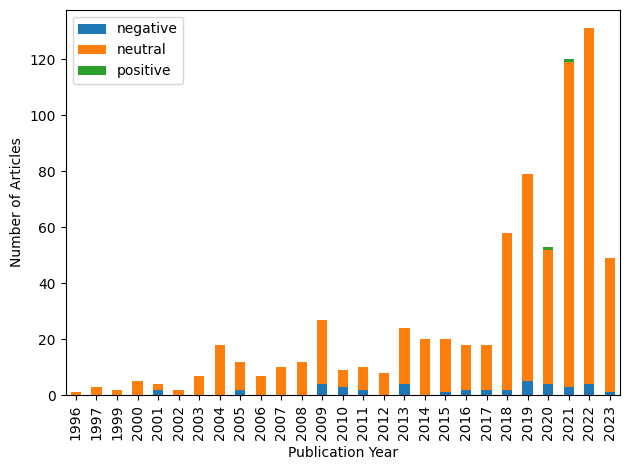

In [5]:
# Group the dataframe by publication_year and sentiment
grouped_df = df.groupby(['publication_year', 'sentiment']).size().unstack()

# Plot stacked bar chart
grouped_df.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')

# Add a legend
plt.legend()

# Save the plot
plt.savefig('../Visuals/Sentiment_Topics/sentiment_klima_per_article_stacked_barchart.png')

# Show the plot
plt.show()

                               OLS Regression Results                               
Dep. Variable:     negative_sentiment_ratio   R-squared:                       0.000
Model:                                  OLS   Adj. R-squared:                 -0.040
Method:                       Least Squares   F-statistic:                  0.007470
Date:                      Thu, 15 Feb 2024   Prob (F-statistic):              0.932
Time:                              11:49:27   Log-Likelihood:                 19.789
No. Observations:                        27   AIC:                            -35.58
Df Residuals:                            25   BIC:                            -32.99
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

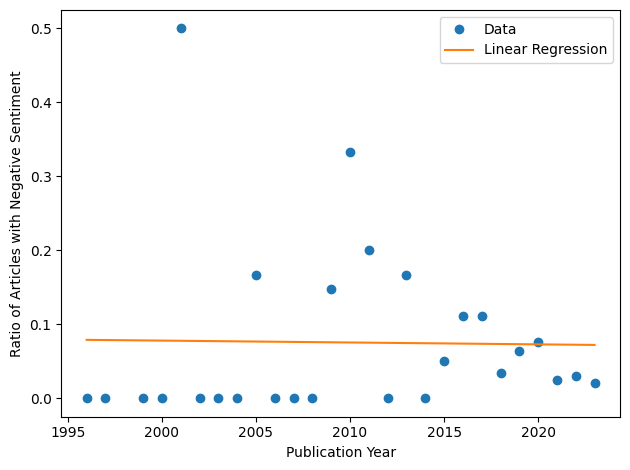

In [6]:
# Visualize the ratio of articles with negative sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with negative sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'negative').sum()})

# Calculate the ratio of articles with negative sentiment to total articles for each year
df_grouped['negative_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['negative_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Negative Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/negative_sentiment_klima_articles_ratio.png')
plt.show()

                               OLS Regression Results                               
Dep. Variable:     positive_sentiment_ratio   R-squared:                       0.119
Model:                                  OLS   Adj. R-squared:                  0.083
Method:                       Least Squares   F-statistic:                     3.362
Date:                      Thu, 15 Feb 2024   Prob (F-statistic):             0.0787
Time:                              11:49:27   Log-Likelihood:                 113.58
No. Observations:                        27   AIC:                            -223.2
Df Residuals:                            25   BIC:                            -220.6
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

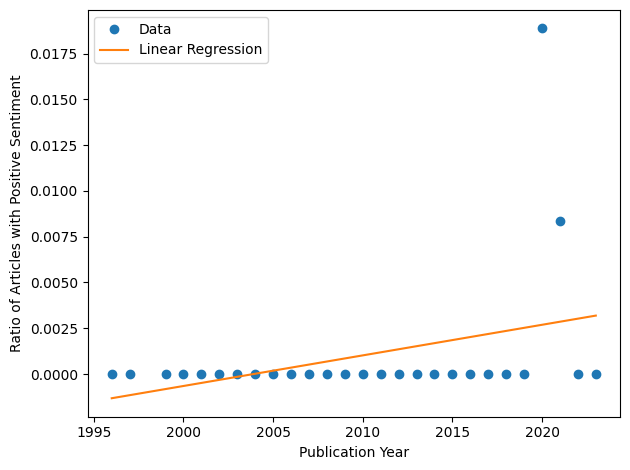

In [7]:
# Visualize the ratio of articles with positive sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with positive sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'positive').sum()})

# Calculate the ratio of articles with positive sentiment to total articles for each year
df_grouped['positive_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['positive_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Positive Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/positive_sentiment_klima_articles_ratio.png')
plt.show()

                               OLS Regression Results                              
Dep. Variable:     neutral_sentiment_ratio   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                 -0.040
Method:                      Least Squares   F-statistic:                 0.0008758
Date:                     Thu, 15 Feb 2024   Prob (F-statistic):              0.977
Time:                             11:49:27   Log-Likelihood:                 19.801
No. Observations:                       27   AIC:                            -35.60
Df Residuals:                           25   BIC:                            -33.01
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

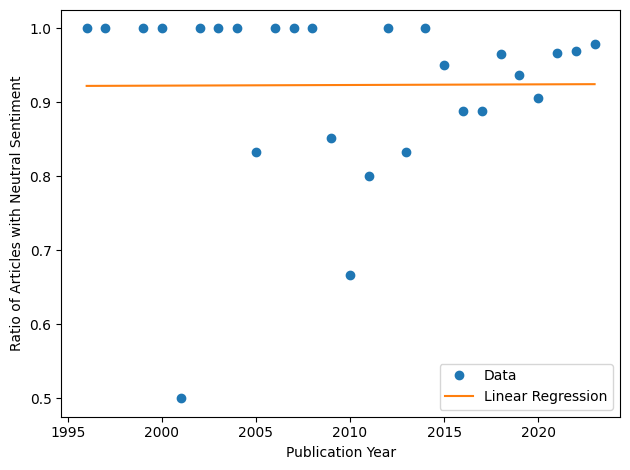

In [8]:
# Visualize the ratio of articles with neutral sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with neutral sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'neutral').sum()})

# Calculate the ratio of articles with neutral sentiment to total articles for each year
df_grouped['neutral_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['neutral_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Neutral Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/neutral_sentiment_klima_articles_ratio.png')
plt.show()

### Further analysis of positive articles

In [9]:
positive_articles = df[df['sentiment'] == 'positive']
positive_articles

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
79,60YG3FC1DY2BS0NC0000000,2020,Das finde ich super! Leider vergisst man oft d...,positive,3.0,11.0,15.0,29.0
140,64CGHB91DY69V2HP0000000,2021,"I. Tolkien, ein gläubiger Katholik, leitete se...",positive,14.0,263.0,21.0,298.0


### Further analysis of negative articles

In [10]:
negative_articles = df[df['sentiment'] == 'negative']
negative_articles

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
42,52763DJ1JC3NY1080000000,2011,Zum Abschluss der Reihe Kulinarisches Kino gab...,negative,0.0,10.0,0.0,10.0
48,5WG76PK1JC3P00CR0000000,2019,Markus Schneider Der Kehlgesang der kanadische...,negative,3.0,25.0,6.0,34.0
50,61JHRRV1DY69V4BF0000000,2020,MMeine Tochter ist 18 Jahre alt. Früher habe i...,negative,2.0,25.0,18.0,45.0
80,63W4XFF1DY2BS0KC0000000,2021,Grüne wollen mit SPD und FDP verhandeln Berlin...,negative,1.0,19.0,2.0,22.0
107,7WPCNM812PN6725G0000000,2009,Mit Anzug und Rucksack steigt er gegen 14.30 U...,negative,3.0,104.0,5.0,112.0
110,5VTNDK51F13R82V10000000,2019,zu Kunstfleisch Dem Tierwohl wäre auf alle Fäl...,negative,1.0,21.0,1.0,23.0
127,623XK3M1DY69V2MC0000000,2021,Als erstes Land weltweit hat Singapur jetzt Fl...,negative,1.0,10.0,2.0,13.0
138,5MX24501DYJRP0SX0000000,2017,"""Es ist absurd, ein ganzes Huhn aufzuziehen, n...",negative,7.0,363.0,19.0,389.0
185,65K16141JCR4R1WJ0000000,2022,"Es knirscht an allen Ecken und Enden. Europa, ...",negative,2.0,42.0,3.0,47.0
215,4FY93TC0TWCNF1TJ0000000,2005,"Die Erwartungen, die die Industrie mit diesem ...",negative,1.0,37.0,0.0,38.0


### Analysis per sentence

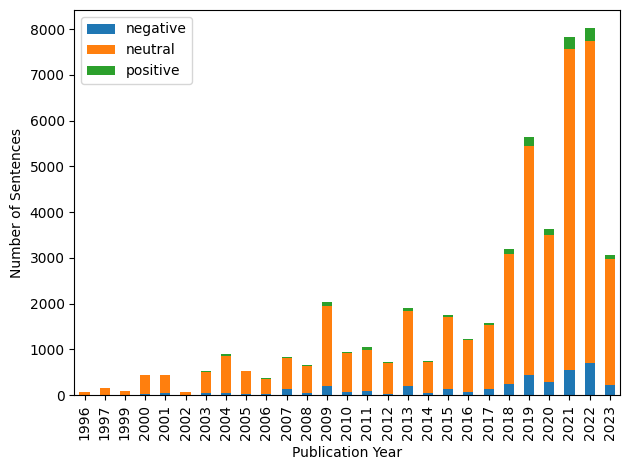

In [11]:
# Group the dataframe by publication_year and calculate the sum of positive, negative, and neutral values for each year
grouped_df = df.groupby('publication_year')[['negative', 'neutral', 'positive']].sum()

# Plot stacked bar chart
grouped_df.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Publication Year')
plt.ylabel('Number of Sentences')

# Add a legend
plt.legend()

# Save the plot
plt.savefig('../Visuals/Sentiment_Topics/sentiment_klima_per_sentence_stacked_barchart.png')

# Show the plot
plt.show()

                               OLS Regression Results                               
Dep. Variable:     negative_sentiment_ratio   R-squared:                       0.000
Model:                                  OLS   Adj. R-squared:                 -0.040
Method:                       Least Squares   F-statistic:                  0.007771
Date:                      Thu, 15 Feb 2024   Prob (F-statistic):              0.930
Time:                              11:49:28   Log-Likelihood:                 59.467
No. Observations:                        27   AIC:                            -114.9
Df Residuals:                            25   BIC:                            -112.3
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

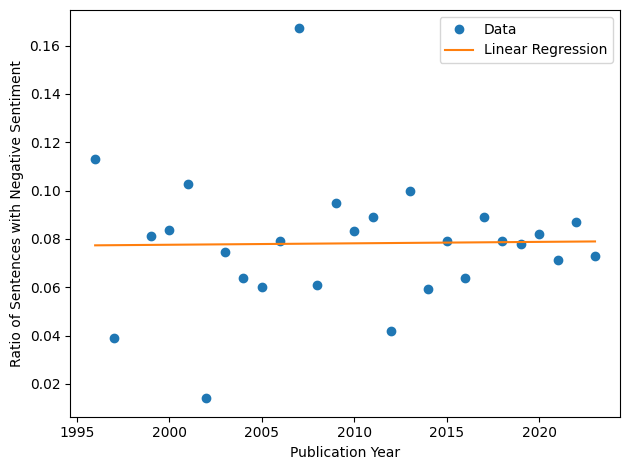

In [12]:
# Group by year and calculate the sum of negative and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'negative': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with negative sentiment to total sentences for each year
df_grouped['negative_sentiment_ratio'] = df_grouped['negative'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['negative_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Negative Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/negative_sentiment_klima_sentences_ratio.png')
plt.show()

                               OLS Regression Results                               
Dep. Variable:     positive_sentiment_ratio   R-squared:                       0.231
Model:                                  OLS   Adj. R-squared:                  0.201
Method:                       Least Squares   F-statistic:                     7.521
Date:                      Thu, 15 Feb 2024   Prob (F-statistic):             0.0111
Time:                              11:49:28   Log-Likelihood:                 81.342
No. Observations:                        27   AIC:                            -158.7
Df Residuals:                            25   BIC:                            -156.1
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

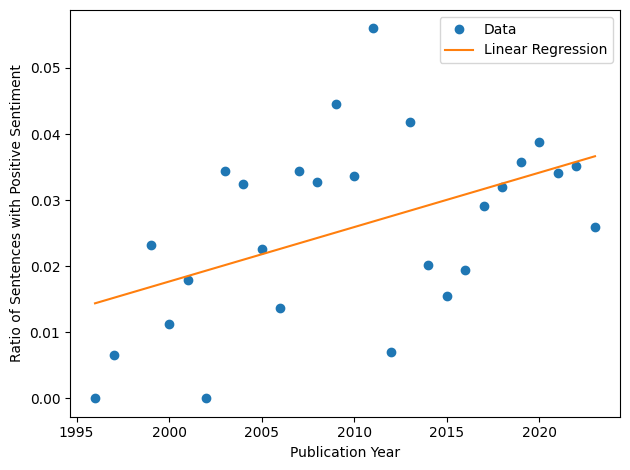

In [13]:
# Group by year and calculate the sum of positive and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'positive': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with positive sentiment to total sentences for each year
df_grouped['positive_sentiment_ratio'] = df_grouped['positive'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['positive_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Positive Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/positive_sentiment_klima_sentences_ratio.png')
plt.show()

                               OLS Regression Results                              
Dep. Variable:     neutral_sentiment_ratio   R-squared:                       0.041
Model:                                 OLS   Adj. R-squared:                  0.003
Method:                      Least Squares   F-statistic:                     1.080
Date:                     Thu, 15 Feb 2024   Prob (F-statistic):              0.309
Time:                             11:49:28   Log-Likelihood:                 53.256
No. Observations:                       27   AIC:                            -102.5
Df Residuals:                           25   BIC:                            -99.92
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

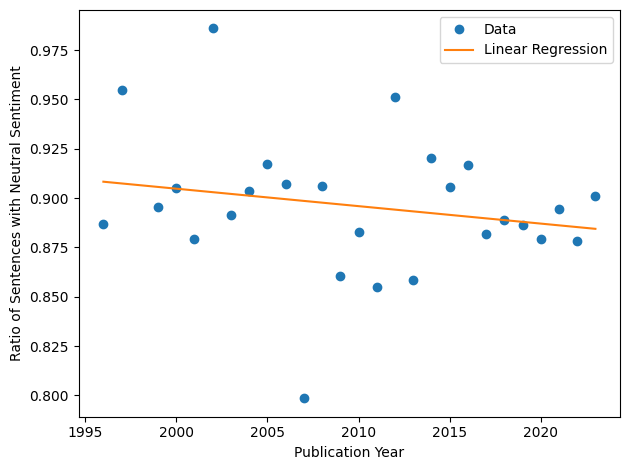

In [14]:
# Group by year and calculate the sum of neutral and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'neutral': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with neutral sentiment to total sentences for each year
df_grouped['neutral_sentiment_ratio'] = df_grouped['neutral'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['neutral_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Neutral Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/neutral_sentiment_klima_sentences_ratio.png')
plt.show()

### Explore anomalies

In [15]:
df_sorted = df.sort_values('positive', ascending=False)
df_sorted.head(50)

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
362,528XMT01JC10031V0000000,2011,1 Einleitung Auf internationaler Ebene waren d...,neutral,55.0,677.0,67.0,799.0
363,624438W1DYG1P4NF0000000,2021,1 Einleitung Die Nutztierhaltung ist u.a. geke...,neutral,52.0,520.0,70.0,642.0
704,7XF9MJ90YC41B35W0000000,2009,WAS RICHTIG NERVTE Schweinegrippe Zensur in Ch...,negative,31.0,62.0,34.0,127.0
523,5YH0KVK1JCSWK0MF0000000,2020,Angesichts des aktuellen SARS-CoV-2-Ausbruchs ...,neutral,29.0,118.0,37.0,184.0
68,65C0J671DY2BS3870000000,2022,Gerade bei der Ernährung tut ein Blick über de...,neutral,18.0,144.0,34.0,196.0
267,66BFH441F15WB2P80000000,2022,"Mein Erweckungserlebnis war, ganz klar, das Co...",neutral,18.0,158.0,52.0,228.0
312,5WYPY101F07YK18P0000000,2019,Text von Corinna Baier und Elisabeth Krafft Se...,negative,16.0,216.0,30.0,262.0
241,57F8DCV1JBK9200R0000000,2013,„Mehr als die Vergangenheit interessiert mich ...,neutral,16.0,353.0,14.0,383.0
89,7VP7VXR12SG140090000000,2009,1. Reykjavik Am Abend des 13. Oktober 2008 gin...,neutral,16.0,272.0,41.0,329.0
726,7Y5T7F412SK2G46M0000000,2010,Der frühere IBM-Chef Thomas Watson ist heute b...,neutral,16.0,410.0,40.0,466.0


In [16]:
df_sorted = df.sort_values('negative', ascending=False)
df_sorted.head(50)

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
363,624438W1DYG1P4NF0000000,2021,1 Einleitung Die Nutztierhaltung ist u.a. geke...,neutral,52.0,520.0,70.0,642.0
362,528XMT01JC10031V0000000,2011,1 Einleitung Auf internationaler Ebene waren d...,neutral,55.0,677.0,67.0,799.0
267,66BFH441F15WB2P80000000,2022,"Mein Erweckungserlebnis war, ganz klar, das Co...",neutral,18.0,158.0,52.0,228.0
491,66FVD341DY4BY4M80000000,2022,Ein Samstagvormittag in einem Shoppingcenter i...,neutral,7.0,166.0,46.0,219.0
89,7VP7VXR12SG140090000000,2009,1. Reykjavik Am Abend des 13. Oktober 2008 gin...,neutral,16.0,272.0,41.0,329.0
726,7Y5T7F412SK2G46M0000000,2010,Der frühere IBM-Chef Thomas Watson ist heute b...,neutral,16.0,410.0,40.0,466.0
523,5YH0KVK1JCSWK0MF0000000,2020,Angesichts des aktuellen SARS-CoV-2-Ausbruchs ...,neutral,29.0,118.0,37.0,184.0
39,4MYT5R50TWX282XX0000000,2007,Auf der Lesegalerie im zweiten Stock sind die ...,neutral,8.0,132.0,37.0,177.0
672,57VVX7K1JDJ5S1560000000,2013,VON PHILIPP BRANDSTÄDTER Weil es die richtige ...,negative,4.0,64.0,35.0,103.0
704,7XF9MJ90YC41B35W0000000,2009,WAS RICHTIG NERVTE Schweinegrippe Zensur in Ch...,negative,31.0,62.0,34.0,127.0
